In [3]:
##import data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import statsmodels.api as sm 
#from statmodels.formula.api import ols

winp=pd.read_excel("G:\Capstone_project\Win Prediction\Win_Prediction_Data.xlsx")
#Repalce ' ' with '_'
winp.columns = winp.columns.str.replace(' ','_')
winp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client_Category   9982 non-null   object        
 1   Solution_Type     10061 non-null  object        
 2   Deal_Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP_Name           10061 non-null  object        
 6   Manager_Name      10061 non-null  object        
 7   Deal_Cost         10061 non-null  float64       
 8   Deal_Status_Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [22]:
## Handiling Duplicate records
duplicate= winp.duplicated()
print(duplicate.sum())
winp[duplicate]

14


,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [23]:
winp.drop_duplicates(inplace=True)

In [24]:
var1=winp["Client_Category"].mode().values[0]
winp["Client_Category"]=winp["Client_Category"].replace(np.nan, var1)
winp.isnull().sum()


Client_Category     0
Solution_Type       0
Deal_Date           0
Sector              0
Location            0
VP_Name             0
Manager_Name        0
Deal_Cost           0
Deal_Status_Code    0
dtype: int64

In [8]:
pd.pivot_table(winp,index=["Client_Category"])

,Deal_Cost
Client_Category,
Airpline,4.952070e+05
Automobiles,6.436649e+05
Consulting,1.053183e+06
Consumer Good,7.378442e+05
Domestic Bank,1.672783e+06
Domestic Private Bank,8.181230e+05
Domestic Public Bank,9.633497e+05
Electronics,5.680864e+05
Energy,1.170759e+06


In [10]:
pd.pivot_table(winp,index=["Client_Category","Sector"])

Deal_Cost
Client_Category Sector                 
Airpline        Sector 15  8.129085e+05
                Sector 2   2.941177e+05
                Sector 24  5.882353e+05
                Sector 25  3.064076e+05
Automobiles     Sector 1   6.928151e+05
...                                 ...
Telecom         Sector 24  1.450626e+06
                Sector 25  4.606209e+05
e-commerce      Sector 22  5.395658e+05
                Sector 24  1.764706e+05
                Sector 25  3.921569e+05

[265 rows x 1 columns]

In [11]:
pd.pivot_table(winp,index=["Location","VP_Name","Client_Category","Sector"])

Deal_Cost
Location VP_Name      Client_Category    Sector                 
L1       Alam Syed    Automobiles        Sector 1   6.493464e+05
                      Consumer Good      Sector 12  3.439412e+05
                      Domestic Bank      Sector 16  2.493303e+06
                                         Sector 17  2.941176e+06
                      Internal           Sector 17  1.472549e+06
...                                                          ...
Others   Vidur Hukle  Internal           Sector 20  5.588235e+05
         neeraj kumar Holding            Sector 2   2.647059e+06
                      Internal           Sector 20  5.768628e+05
         som dutt     Internal           Sector 20  5.624632e+05
                      International Bank Sector 2   1.305882e+06

[2238 rows x 1 columns]

In [16]:
pd.pivot_table(winp,index=["Location","VP_Name","Sector"], values=["Deal_Cost"])

Deal_Cost
Location VP_Name      Sector                 
L1       Alam Syed    Sector 1   6.114973e+05
                      Sector 12  3.439412e+05
                      Sector 14  1.189076e+06
                      Sector 16  2.493303e+06
                      Sector 17  2.060000e+06
...                                       ...
Others   Vidur Hukle  Sector 20  5.588235e+05
         neeraj kumar Sector 2   2.647059e+06
                      Sector 20  5.768628e+05
         som dutt     Sector 2   1.305882e+06
                      Sector 20  5.624632e+05

[1211 rows x 1 columns]

In [18]:
pd.pivot_table(winp,index=["Location","VP_Name","Sector"], values=["Deal_Cost"], aggfunc=np.sum)

Deal_Cost
Location VP_Name      Sector                
L1       Alam Syed    Sector 1    6726470.60
                      Sector 12   1719705.89
                      Sector 14   8323529.41
                      Sector 16  32412941.18
                      Sector 17  10300000.00
...                                      ...
Others   Vidur Hukle  Sector 20    558823.53
         neeraj kumar Sector 2    5294117.64
                      Sector 20   1730588.25
         som dutt     Sector 2    2611764.70
                      Sector 20   8999411.79

[1211 rows x 1 columns]

In [19]:
pd.pivot_table(winp,index=["Location","VP_Name","Sector"], values=["Deal_Cost"], aggfunc=[np.mean, len])

mean       len
                                    Deal_Cost Deal_Cost
Location VP_Name      Sector                           
L1       Alam Syed    Sector 1   6.114973e+05      11.0
                      Sector 12  3.439412e+05       5.0
                      Sector 14  1.189076e+06       7.0
                      Sector 16  2.493303e+06      13.0
                      Sector 17  2.060000e+06       5.0
...                                       ...       ...
Others   Vidur Hukle  Sector 20  5.588235e+05       1.0
         neeraj kumar Sector 2   2.647059e+06       2.0
                      Sector 20  5.768628e+05       3.0
         som dutt     Sector 2   1.305882e+06       2.0
                      Sector 20  5.624632e+05      16.0

[1211 rows x 2 columns]

In [26]:
pd.pivot_table(winp,index=["Location","Sector"], values=["Deal_Cost"],columns=["Deal_Status_Code"], aggfunc=[np.mean, len])

mean                     len      
                       Deal_Cost               Deal_Cost      
Deal_Status_Code            Lost           Won      Lost   Won
Location Sector                                               
L1       Sector 1   7.474048e+05  6.590620e+05      34.0  37.0
         Sector 10  2.941177e+04           NaN       2.0   NaN
         Sector 11  5.882353e+05           NaN       2.0   NaN
         Sector 12  6.884454e+05  9.826261e+05      56.0  56.0
         Sector 13  1.470588e+06  1.573456e+06       2.0   4.0
...                          ...           ...       ...   ...
Others   Sector 24  2.440821e+06  8.589706e+05      53.0  22.0
         Sector 25  6.637255e+05  3.235294e+05       6.0   1.0
         Sector 3   4.514706e+05           NaN       4.0   NaN
         Sector 4   2.284314e+06           NaN       6.0   NaN
         Sector 9   9.166667e+05  7.721895e+05       6.0   9.0

[201 rows x 4 columns]

In [32]:
pd.pivot_table(winp,index=["VP_Name","Sector"], values=["Deal_Cost"],columns=["Location"], aggfunc=[np.sum], fill_value=0)

sum                                               \
                       Deal_Cost                                                
Location                      L1          L10  L11  L12   L2          L3   L4   
VP_Name   Sector                                                                
Alam Syed Sector 1    6726470.60         0.00  0.0  0.0  0.0   640588.24  0.0   
          Sector 12   1719705.89    588235.30  0.0  0.0  0.0   114117.64  0.0   
          Sector 14   8323529.41         0.00  0.0  0.0  0.0        0.00  0.0   
          Sector 16  32412941.18         0.00  0.0  0.0  0.0        0.00  0.0   
          Sector 17  10300000.00  29873529.42  0.0  0.0  0.0  2337941.16  0.0   
...                          ...          ...  ...  ...  ...         ...  ...   
som dutt  Sector 5     647058.82    588235.30  0.0  0.0  0.0        0.00  0.0   
          Sector 6          0.00    588235.30  0.0  0.0  0.0        0.00  0.0   
          Sector 7          0.00         0.00  0.0  0.0  0.0        0.00  0.0   
          Sector 8          0.00   2305882.36  0.0  0.0  0.0        0.00  0.0   
          Sector 9          0.00   1294117.64  0.0  0.0  0.0        0.00  0.0   

                                                                         
                                                                         
Location                    L5          L6   L7   L8          L9 Others  
VP_Name   Sector                                                         
Alam Syed Sector 1        0.00        0.00  0.0  0.0        0.00    0.0  
          Sector 12       0.00  1176470.58  0.0  0.0        0.00    0.0  
          Sector 14       0.00        0.00  0.0  0.0        0.00    0.0  
          Sector 16       0.00        0.00  0.0  0.0  8157352.96    0.0  
          Sector 17       0.00        0.00  0.0  0.0        0.00    0.0  
...                        ...         ...  ...  ...         ...    ...  
som dutt  Sector 5        0.00        0.00  0.0  0.0        0.00    0.0  
          Sector 6        0.00        0.00  0.0  0.0        0.00    0.0  
          Sector 7   647058.82        0.00  0.0  0.0        0.00    0.0  
          Sector 8        0.00        0.00  0.0  0.0        0.00    0.0  
          Sector 9   352941.18    25294.12  0.0  0.0        0.00    0.0  

[547 rows x 13 columns]

In [35]:
pd.pivot_table(winp,index=["Sector","VP_Name"], values=["Deal_Cost"],columns=["Location"], aggfunc=[np.sum], fill_value=0)

sum                                    \
                           Deal_Cost                                     
Location                          L1         L10  L11         L12   L2   
Sector   VP_Name                                                         
Sector 1 Alam Syed        6726470.60        0.00  0.0        0.00  0.0   
         Ankita Aggarwal  1235294.12  3852352.96  0.0  2369411.76  0.0   
         Brendon Wycoff         0.00        0.00  0.0        0.00  0.0   
         Ekta Zutshi            0.00        0.00  0.0        0.00  0.0   
         Gayle Molter           0.00  1764705.88  0.0        0.00  0.0   
...                              ...         ...  ...         ...  ...   
Sector 9 Varsha Arora           0.00        0.00  0.0        0.00  0.0   
         Vidur Hukle            0.00        0.00  0.0        0.00  0.0   
         Vikram Rawat           0.00        0.00  0.0        0.00  0.0   
         neeraj kumar           0.00        0.00  0.0        0.00  0.0   
         som dutt               0.00  1294117.64  0.0        0.00  0.0   

                                                                           \
                                                                            
Location                          L3   L4          L5        L6   L7   L8   
Sector   VP_Name                                                            
Sector 1 Alam Syed         640588.24  0.0        0.00      0.00  0.0  0.0   
         Ankita Aggarwal  3377058.83  0.0   932352.95      0.00  0.0  0.0   
         Brendon Wycoff         0.00  0.0  2058823.54      0.00  0.0  0.0   
         Ekta Zutshi            0.00  0.0   573529.42      0.00  0.0  0.0   
         Gayle Molter     1852941.18  0.0        0.00      0.00  0.0  0.0   
...                              ...  ...         ...       ...  ...  ...   
Sector 9 Varsha Arora           0.00  0.0  5627058.83      0.00  0.0  0.0   
         Vidur Hukle            0.00  0.0  2020588.24      0.00  0.0  0.0   
         Vikram Rawat           0.00  0.0   844705.89      0.00  0.0  0.0   
         neeraj kumar           0.00  0.0  8529411.76      0.00  0.0  0.0   
         som dutt               0.00  0.0   352941.18  25294.12  0.0  0.0   

                                           
                                           
Location                   L9      Others  
Sector   VP_Name                           
Sector 1 Alam Syed        0.0        0.00  
         Ankita Aggarwal  0.0  1764705.88  
         Brendon Wycoff   0.0        0.00  
         Ekta Zutshi      0.0        0.00  
         Gayle Molter     0.0        0.00  
...                       ...         ...  
Sector 9 Varsha Arora     0.0        0.00  
         Vidur Hukle      0.0        0.00  
         Vikram Rawat     0.0        0.00  
         neeraj kumar     0.0        0.00  
         som dutt         0.0        0.00  

[547 rows x 13 columns]

In [36]:
pd.pivot_table(winp,index=["Sector","VP_Name","Location"], values=["Deal_Cost"], aggfunc=[np.sum], fill_value=0)

sum
                                    Deal_Cost
Sector   VP_Name         Location            
Sector 1 Alam Syed       L1        6726470.60
                         L3         640588.24
         Ankita Aggarwal L1        1235294.12
                         L10       3852352.96
                         L12       2369411.76
...                                       ...
Sector 9 Vikram Rawat    L5         844705.89
         neeraj kumar    L5        8529411.76
         som dutt        L10       1294117.64
                         L5         352941.18
                         L6          25294.12

[1211 rows x 1 columns]

In [38]:
pd.pivot_table(winp,index=["VP_Name","Sector"], values=["Deal_Cost"],
               columns=["Location"], aggfunc=[np.sum], fill_value=0, margins=True)

sum                                            \
                        Deal_Cost                                             
Location                       L1           L10           L11           L12   
VP_Name   Sector                                                              
Alam Syed Sector 1   6.726471e+06  0.000000e+00  0.000000e+00  0.000000e+00   
          Sector 12  1.719706e+06  5.882353e+05  0.000000e+00  0.000000e+00   
          Sector 14  8.323529e+06  0.000000e+00  0.000000e+00  0.000000e+00   
          Sector 16  3.241294e+07  0.000000e+00  0.000000e+00  0.000000e+00   
          Sector 17  1.030000e+07  2.987353e+07  0.000000e+00  0.000000e+00   
...                           ...           ...           ...           ...   
som dutt  Sector 6   0.000000e+00  5.882353e+05  0.000000e+00  0.000000e+00   
          Sector 7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          Sector 8   0.000000e+00  2.305882e+06  0.000000e+00  0.000000e+00   
          Sector 9   0.000000e+00  1.294118e+06  0.000000e+00  0.000000e+00   
All                  1.038497e+09  2.755047e+09  1.645603e+08  2.703832e+08   

                                                                          \
                                                                           
Location                     L2            L3           L4            L5   
VP_Name   Sector                                                           
Alam Syed Sector 1         0.00  6.405882e+05         0.00  0.000000e+00   
          Sector 12        0.00  1.141176e+05         0.00  0.000000e+00   
          Sector 14        0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 16        0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 17        0.00  2.337941e+06         0.00  0.000000e+00   
...                         ...           ...          ...           ...   
som dutt  Sector 6         0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 7         0.00  0.000000e+00         0.00  6.470588e+05   
          Sector 8         0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 9         0.00  0.000000e+00         0.00  3.529412e+05   
All                  8661764.71  2.484318e+08  99422647.15  1.838246e+09   

                                                                           \
                                                                            
Location                      L6            L7           L8            L9   
VP_Name   Sector                                                            
Alam Syed Sector 1          0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 12   1176470.58  0.000000e+00         0.00  0.000000e+00   
          Sector 14         0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 16         0.00  0.000000e+00         0.00  8.157353e+06   
          Sector 17         0.00  0.000000e+00         0.00  0.000000e+00   
...                          ...           ...          ...           ...   
som dutt  Sector 6          0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 7          0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 8          0.00  0.000000e+00         0.00  0.000000e+00   
          Sector 9      25294.12  0.000000e+00         0.00  0.000000e+00   
All                  57518235.37  1.227632e+08  14691176.45  1.306688e+08   

                                                 
                                                 
Location                   Others           All  
VP_Name   Sector                                 
Alam Syed Sector 1   0.000000e+00  7.367059e+06  
          Sector 12  0.000000e+00  3.598529e+06  
          Sector 14  0.000000e+00  8.323529e+06  
          Sector 16  0.000000e+00  4.057029e+07  
          Sector 17  0.000000e+00  4.251147e+07  
...                           ...           ...  
som dutt  Sector 6   0.000000e+00  5.882353e+05

In [41]:
pd.pivot_table(winp,index=["Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum], fill_value=0, margins=True)

sum                            
                     Deal_Cost                            
Deal_Status_Code          Lost           Won           All
Manager_Name                                              
Aastha Gandhi     0.000000e+00  2.426471e+05  2.426471e+05
Abhinav Warrier   4.710471e+07  4.533529e+06  5.163824e+07
Abhishek Singhal  3.400588e+07  1.097000e+07  4.497588e+07
Abhiskek Kumar    5.319412e+07  2.232529e+07  7.551941e+07
Abhiskhek  D      1.586765e+07  9.391471e+06  2.525912e+07
...                        ...           ...           ...
som dutt          0.000000e+00  5.958824e+05  5.958824e+05
sunder paal       1.764706e+06  2.231765e+06  3.996471e+06
vansu dev         7.529706e+07  6.767794e+07  1.429750e+08
vinit katariya    1.538235e+07  7.834412e+06  2.321676e+07
All               4.761067e+09  2.947959e+09  7.709026e+09

[279 rows x 3 columns]

In [45]:
pd.pivot_table(winp,index=["VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum], fill_value=0, margins=True)

sum                            
                                     Deal_Cost                            
Deal_Status_Code                          Lost           Won           All
VP_Name   Manager_Name                                                    
Alam Syed Abhinav Warrier         9.705882e+05  0.000000e+00  9.705882e+05
          Alam Syed               0.000000e+00  7.058824e+06  7.058824e+06
          Darin Vath              5.358824e+06  1.314059e+07  1.849941e+07
          Deepak Chandra Prakash  2.176471e+07  8.182353e+06  2.994706e+07
          Dennis Faux             0.000000e+00  7.352941e+05  7.352941e+05
...                                        ...           ...           ...
som dutt  nahar singh             1.205882e+07  3.073529e+06  1.513235e+07
          ram dutt gupta          0.000000e+00  7.352941e+04  7.352941e+04
          sheak shakir            8.823529e+05  9.647059e+05  1.847059e+06
          som dutt                0.000000e+00  5.000000e+05  5.000000e+05
All                               4.761067e+09  2.947959e+09  7.709026e+09

[961 rows x 3 columns]

In [60]:
pd.pivot_table(winp,index=["Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum], fill_value=0, margins=True)

sum                            
                     Deal_Cost                            
Deal_Status_Code          Lost           Won           All
Manager_Name                                              
Aastha Gandhi     0.000000e+00  2.426471e+05  2.426471e+05
Abhinav Warrier   4.710471e+07  4.533529e+06  5.163824e+07
Abhishek Singhal  3.400588e+07  1.097000e+07  4.497588e+07
Abhiskek Kumar    5.319412e+07  2.232529e+07  7.551941e+07
Abhiskhek  D      1.586765e+07  9.391471e+06  2.525912e+07
...                        ...           ...           ...
som dutt          0.000000e+00  5.958824e+05  5.958824e+05
sunder paal       1.764706e+06  2.231765e+06  3.996471e+06
vansu dev         7.529706e+07  6.767794e+07  1.429750e+08
vinit katariya    1.538235e+07  7.834412e+06  2.321676e+07
All               4.761067e+09  2.947959e+09  7.709026e+09

[279 rows x 3 columns]

In [68]:
winp_pivot=pd.pivot_table(winp,index=["VP_Name","Manager_Name"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum,len])

<AxesSubplot:xlabel='VP_Name,Manager_Name'>

<Figure size 1440x576 with 0 Axes>

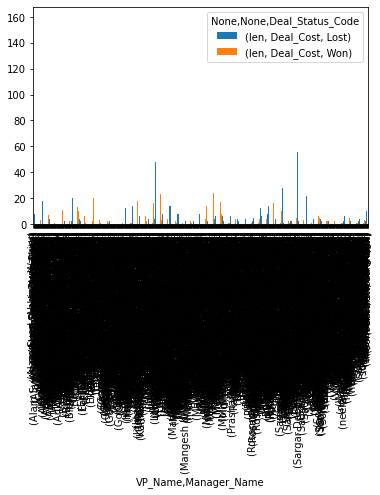

In [55]:
plt.figure(figsize=(20,8))
winp_pivot.plot(kind="bar")

In [74]:
# gb_res_winp3.reindex(gb_res_winp3['Won_Deal_Cost'].sort_values( ascending=False).index).head(5)
#df = df_pivot.reindex(df_pivot['Value'].sort_values(by=2012, ascending=False).index)
#print(winp_pivot)
print(winp_pivot['Deal_Cost'])

#print(winp_pivot.reindex(winp_pivot['Deal_Status_Code'].sort_values(by='Won',ascending=False).index).head(5))


KeyError: 'Deal_Cost'

In [ ]:
winp_pivot=pd.pivot_table(winp,index=["VP_Name","Manager_Name"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum,len])

In [83]:
#df_pivot.sort_values(by=('Global_Sales','XOne'), ascending=False)

winp_pivot.sort_values(by=('sum','Deal_Cost','Won'), ascending=False).head(5)


sum                    len    
                                       Deal_Cost              Deal_Cost    
Deal_Status_Code                            Lost          Won      Lost Won
VP_Name          Manager_Name                                              
Varsha Arora     Rahul Singh                0.00  94702352.94         0   6
Mangesh K. Singh Zulema Perrine      26738235.28  76648235.29        10   9
Ekta Zutshi      Jitendra Choudhary   1558823.54  69730588.23         6  11
Long Bergstrom   Russell Dahlen      21835294.12  63152352.92        30  75
Ekta Zutshi      neeraj kumar         1088235.30  58524411.78         6  40

In [88]:
#df_pivot.sort_values(by=('Global_Sales','XOne'), ascending=False)
winp_pivot1=pd.pivot_table(winp,index=["VP_Name","Manager_Name","Location"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum,len])
winp_pivot1.sort_values(by=('sum','Deal_Cost','Won'), ascending=False).head(100)


sum               \
                                                Deal_Cost                
Deal_Status_Code                                     Lost          Won   
VP_Name          Manager_Name       Location                             
Varsha Arora     Rahul Singh        Others           0.00  93794117.65   
Mangesh K. Singh Zulema Perrine     Others    24202352.94  72317941.17   
Ekta Zutshi      Jitendra Choudhary L5         1558823.54  68098235.29   
Mangesh K. Singh Vinay Kumar        Others     5882352.94  58235294.11   
Long Bergstrom   Russell Dahlen     L10       19629411.76  53672647.02   
...                                                   ...          ...   
Ankita Aggarwal  bhagwati prasad    Others     8088235.32   6778235.29   
Sargar Deep Rao  Vidur Hukle        L5        14833529.42   6755294.14   
som dutt         Emil Knudsen       L11              0.00   6617647.06   
Long Bergstrom   Russell Dahlen     L3          500000.00   6614705.89   
Ekta Zutshi      Roopal Singh       L10              0.00   6564411.76   

                                                   len      
                                             Deal_Cost      
Deal_Status_Code                                  Lost Won  
VP_Name          Manager_Name       Location                
Varsha Arora     Rahul Singh        Others           0   5  
Mangesh K. Singh Zulema Perrine     Others           4   7  
Ekta Zutshi      Jitendra Choudhary L5               6  10  
Mangesh K. Singh Vinay Kumar        Others           2   3  
Long Bergstrom   Russell Dahlen     L10             26  53  
...                                                ...  ..  
Ankita Aggarwal  bhagwati prasad    Others          14   6  
Sargar Deep Rao  Vidur Hukle        L5              50  21  
som dutt         Emil Knudsen       L11              0   2  
Long Bergstrom   Russell Dahlen     L3               2  15  
Ekta Zutshi      Roopal Singh       L10              0   2  

[100 rows x 4 columns]

In [91]:
#df_pivot.sort_values(by=('Global_Sales','XOne'), ascending=False)
winp_pivot2=pd.pivot_table(winp,index=["Manager_Name","Client_Category","Solution_Type"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum,len])
winp_pivot2.sort_values(by=('sum','Deal_Cost','Won'), ascending=False).head(100)

sum  \
                                                          Deal_Cost   
Deal_Status_Code                                               Lost   
Manager_Name       Client_Category       Solution_Type                
Rahul Singh        Internal              Solution 11           0.00   
Jitendra Choudhary Consulting            Solution 32      875294.12   
Vinay Kumar        Internal              Solution 30    10588235.30   
Zulema Perrine     Internal              Solution 39    15437647.06   
neeraj kumar       Consulting            Solution 32     5829411.76   
...                                                             ...   
keshar ansari      Domestic Private Bank Solution 4            0.00   
rohit              Internal              Solution 28    34602941.18   
Eesha Yadav        Others                Solution 10     1882352.94   
Roop Sachdeva      Others                Solution 32     4920588.24   
Shalendra D.       Services_based        Solution 4      1764705.88   

                                                                          len  \
                                                                    Deal_Cost   
Deal_Status_Code                                                Won      Lost   
Manager_Name       Client_Category       Solution_Type                          
Rahul Singh        Internal              Solution 11    93794117.65         0   
Jitendra Choudhary Consulting            Solution 32    67024705.88         2   
Vinay Kumar        Internal              Solution 30    58235294.11         4   
Zulema Perrine     Internal              Solution 39    45837352.94         4   
neeraj kumar       Consulting            Solution 32    42468823.55        10   
...                                                             ...       ...   
keshar ansari      Domestic Private Bank Solution 4      5588235.29         0   
rohit              Internal              Solution 28     5572058.84        36   
Eesha Yadav        Others                Solution 10     5558823.53         4   
Roop Sachdeva      Others                Solution 32     5544117.64        12   
Shalendra D.       Services_based        Solution 4      5540000.01         2   

                                                            
                                                            
Deal_Status_Code                                       Won  
Manager_Name       Client_Category       Solution_Type      
Rahul Singh        Internal              Solution 11     5  
Jitendra Choudhary Consulting            Solution 32     9  
Vinay Kumar        Internal              Solution 30     3  
Zulema Perrine     Internal              Solution 39     4  
neeraj kumar       Consulting            Solution 32    30  
...                                                     ..  
keshar ansari      Domestic Private Bank Solution 4      1  
rohit              Internal              Solution 28    24  
Eesha Yadav        Others                Solution 10     2  
Roop Sachdeva      Others                Solution 32     6  
Shalendra D.       Services_based        Solution 4      4  

[100 rows x 4 columns]

In [95]:
#df_pivot.sort_values(by=('Global_Sales','XOne'), ascending=False)
winp_pivot2=pd.pivot_table(winp,index=["Manager_Name","Client_Category","Solution_Type"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum,len])



In [101]:
winp_pivot2_5=winp_pivot2.sort_values(by=('len','Deal_Cost','Won'), ascending=False).head(5)
winp_pivot2_5

sum               \
                                                  Deal_Cost                
Deal_Status_Code                                       Lost          Won   
Manager_Name     Client_Category Solution_Type                             
Molly Eakes      Internal        Solution 32     5451764.70  12943529.46   
neeraj kumar     Consulting      Solution 32     5829411.76  42468823.55   
Gayle Molter     Others          Solution 32     3141176.48  26241764.71   
Karna Bhuvennant Others          Solution 20     2708823.54   7101470.57   
rohit            Internal        Solution 28    34602941.18   5572058.84   

                                                     len      
                                               Deal_Cost      
Deal_Status_Code                                    Lost Won  
Manager_Name     Client_Category Solution_Type                
Molly Eakes      Internal        Solution 32          12  32  
neeraj kumar     Consulting      Solution 32          10  30  
Gayle Molter     Others          Solution 32          10  29  
Karna Bhuvennant Others          Solution 20          14  27  
rohit            Internal        Solution 28          36  24

<AxesSubplot:xlabel='Manager_Name,Client_Category,Solution_Type'>

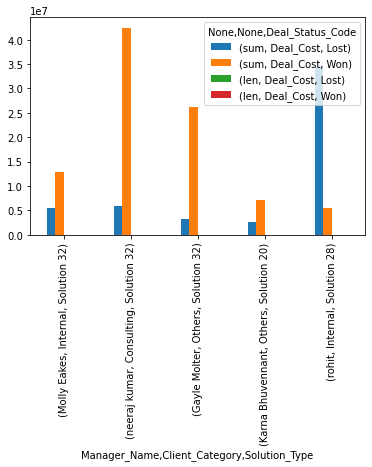

In [102]:
winp_pivot2_5.plot(kind='bar')

<AxesSubplot:ylabel='(sum, Deal_Cost, Won)'>

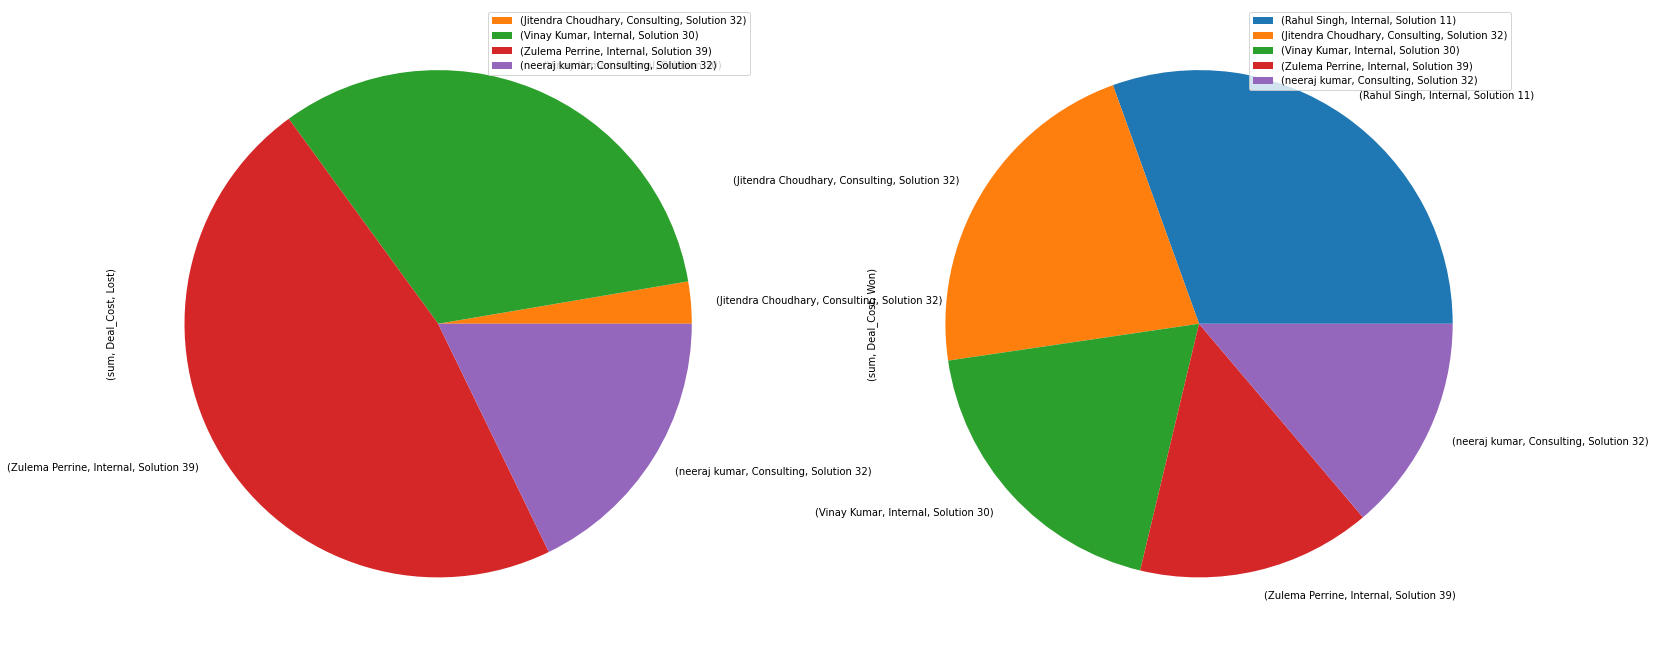

In [114]:
#df_pivot.sort_values(by=('Global_Sales','XOne'), ascending=False)
winp_pivot3=pd.pivot_table(winp,index=["Manager_Name","Client_Category","Solution_Type"], values=["Deal_Cost"],
                          columns=["Deal_Status_Code"], fill_value=0, aggfunc=[ np.sum])
                                                                               
winp_pivot3_5=winp_pivot3.sort_values(by=('sum','Deal_Cost','Won'), ascending=False).head(5)
winp_pivot3_5                                                                               
winp_pivot3_5.plot(kind='pie',subplots=True,figsize=(25,15))

In [104]:
winp_pivot2_5=winp_pivot2.sort_values(by=('len','Deal_Cost','Lost'), ascending=False).head(5)
winp_pivot2_5

sum               \
                                                 Deal_Cost                
Deal_Status_Code                                      Lost          Won   
Manager_Name    Client_Category Solution_Type                             
Molly Eakes     Services_based  Solution 32    12397058.82   4823529.40   
bhagwati prasad Internal        Solution 9     24197647.10  26793235.29   
rohit           Internal        Solution 28    34602941.18   5572058.84   
Desmond Krout   Internal        Solution 28    17956470.58   2697941.21   
Rudraksh Sharma Others          Solution 67    17411764.68   5080588.26   

                                                    len      
                                              Deal_Cost      
Deal_Status_Code                                   Lost Won  
Manager_Name    Client_Category Solution_Type                
Molly Eakes     Services_based  Solution 32          40  12  
bhagwati prasad Internal        Solution 9           36  12  
rohit           Internal        Solution 28          36  24  
Desmond Krout   Internal        Solution 28          32  16  
Rudraksh Sharma Others          Solution 67          32  14

<AxesSubplot:xlabel='Manager_Name,Client_Category,Solution_Type'>

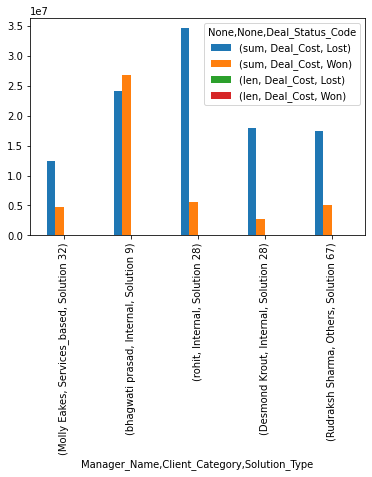

In [105]:
winp_pivot2_5.plot(kind='bar')